In [5]:
import numpy as np
import matplotlib.pyplot as plt
from uu_main import UUtest, fitUU_1d
from uu_distr import cdfUU, pdfUU

N=1000

In [22]:
def is_unimodal(X):
    S = UUtest(X)
    return len(S) > 0

def get_distributions(X):
    S, p = fitUU_1d(X)
    y_cdf, x = cdfUU(X, S, p)
    y_pdf, x = pdfUU(X, S, p)
    return x, y_cdf, y_pdf

def plot_distributions(X, x = None, y_cdf = None, y_pdf = None):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(X, bins=N//20, cumulative=True, density=True, histtype='step', label='ECDF')
    if y_cdf is not None:
        plt.plot(x, y_cdf, label='Fitted CDF', color='red')
    plt.title('Empirical CDF vs Fitted CDF')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc='upper left', frameon=False)

    plt.subplot(1, 2, 2)
    plt.hist(X, bins=N//20, density=True, label='Histogram')
    if y_pdf is not None:
        plt.plot(x, y_pdf, label='Fitted PDF', color='red')
    plt.title('Histogram vs Fitted PDF')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(loc='upper left', frameon=False)

    plt.tight_layout()
    plt.show()

In [23]:
def summarize(X):
    if(not is_unimodal(X)):
        print("The dataset is multimodal.")
        plot_distributions(X)
    else:
        print("The dataset is unimodal.")
        x, y_cdf, y_pdf = get_distributions(X)
        plot_distributions(X, x, y_cdf, y_pdf)

## $X \sim \mathcal{N}(0,1) $

The dataset is unimodal.


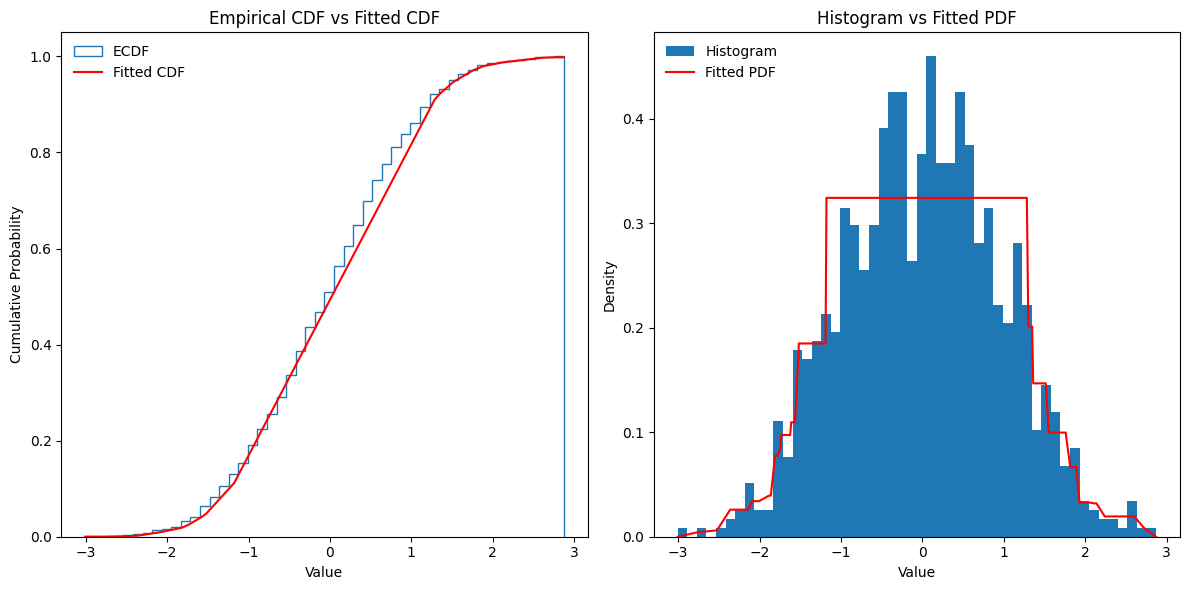

In [24]:
X = np.random.normal(0, 1, N)
summarize(X)

## $X = X_1+X_2$ gdzie $X_1 \sim \mathcal{N}(0,1) $ oraz $X_2 \sim \mathcal{N}(7,1) $

The dataset is multimodal.


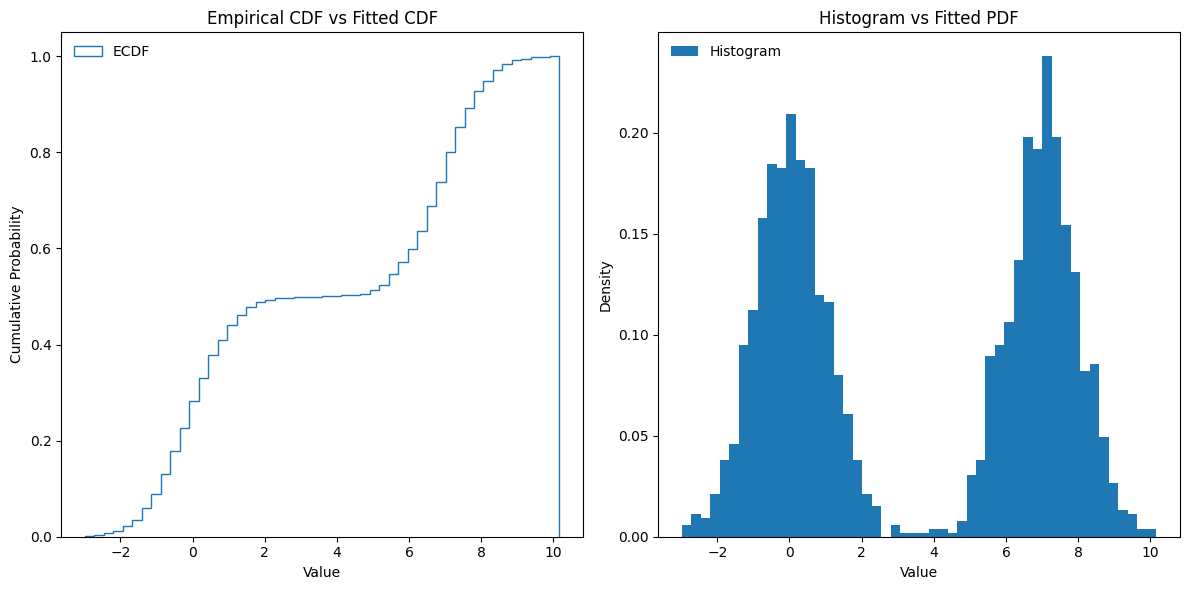

In [25]:
X1 = np.random.normal(0, 1, N)
X2 = np.random.normal(7, 1, N)
X = np.concatenate([X1, X2])

summarize(X)

## $X = |Y|$ gdzie $Y \sim \mathcal{N}(0,1) $

The dataset is unimodal.


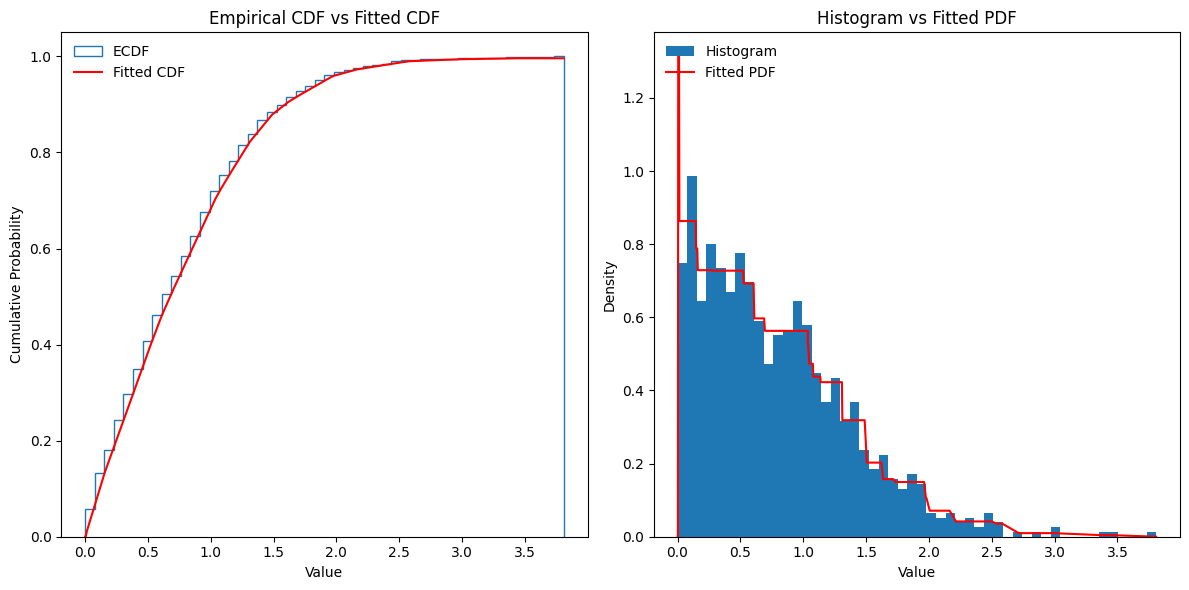

In [26]:
X = np.random.normal(0, 1, N)
X = [abs(x) for x in X]
summarize(X)

## $X  \sim \mathcal{Pa}(2) $

The dataset is unimodal.


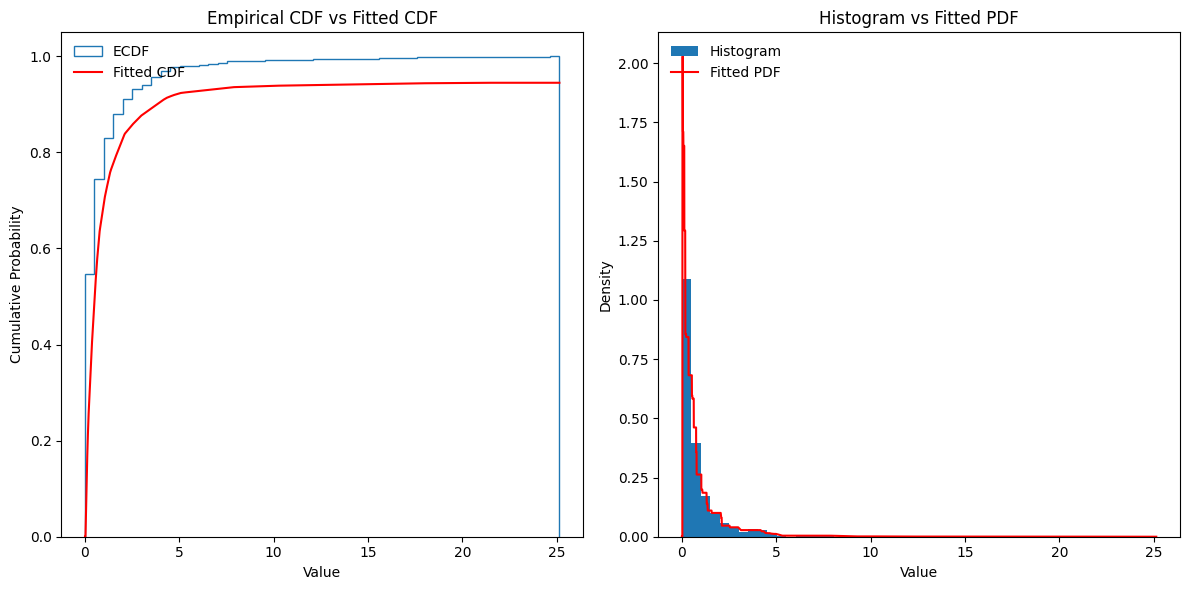

In [27]:
X = np.random.pareto(2, N)
summarize(X)

## $X  \sim \mathcal{E}(1) $

The dataset is unimodal.


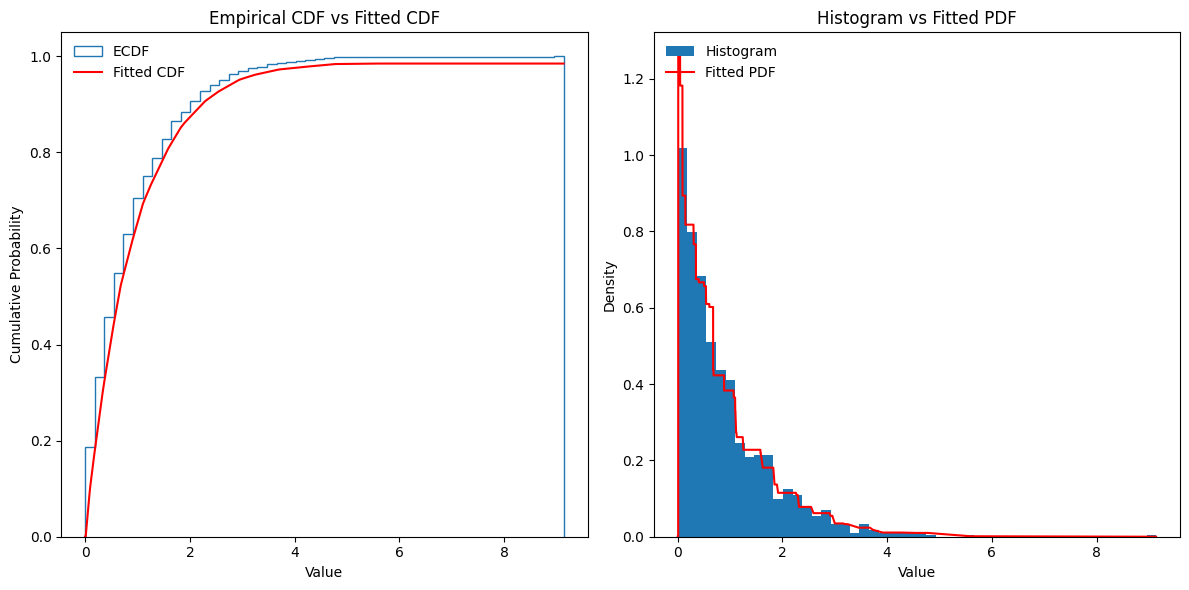

In [30]:
X = np.random.exponential(1, N)
summarize(X)

## $X  \sim \mathcal{Ra}(1) $

The dataset is unimodal.


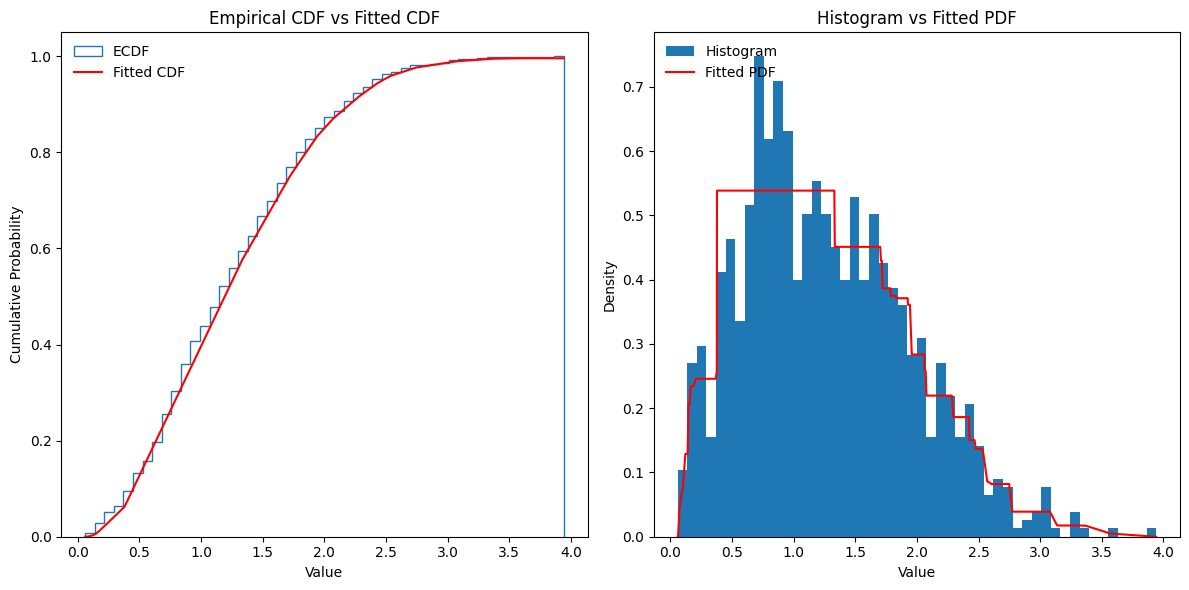

In [31]:
X = np.random.rayleigh(1, N)
summarize(X)

## $X = X_1+0.2 X_2+0.4 X_3$ gdzie $X_1 \sim \mathcal{N}(-5,1) $, $X_2 \sim \mathcal{N}(0,1) $, $X_3 \sim \mathcal{N}(5,1) $

The dataset is multimodal.


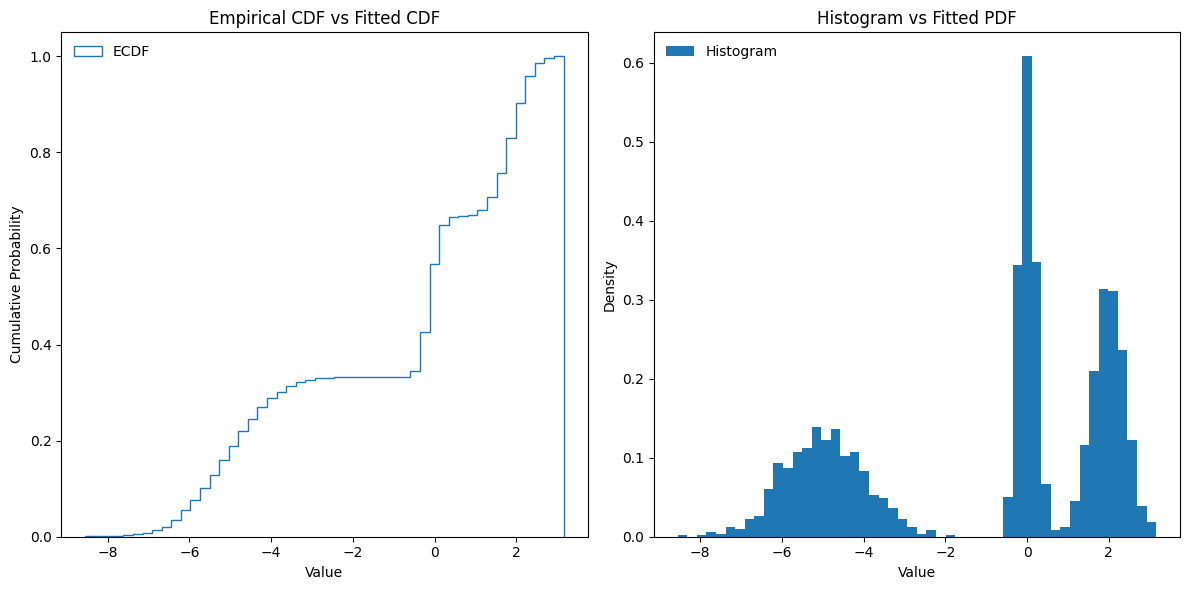

In [33]:
X1 = np.random.normal(loc=-5, scale=1, size=700)
X2 = 0.2*np.random.normal(loc=0, scale=1, size=700)
X3 = 0.4*np.random.normal(loc=5, scale=1, size=700)

X = np.concatenate([X1, X2, X3])
summarize(X)

# $X = X_1 + X_2$, gdzie $X_1 \sim \mathcal{U}(0,1) $, $X_2 \sim \mathcal{U}(4,5) $

The dataset is unimodal.


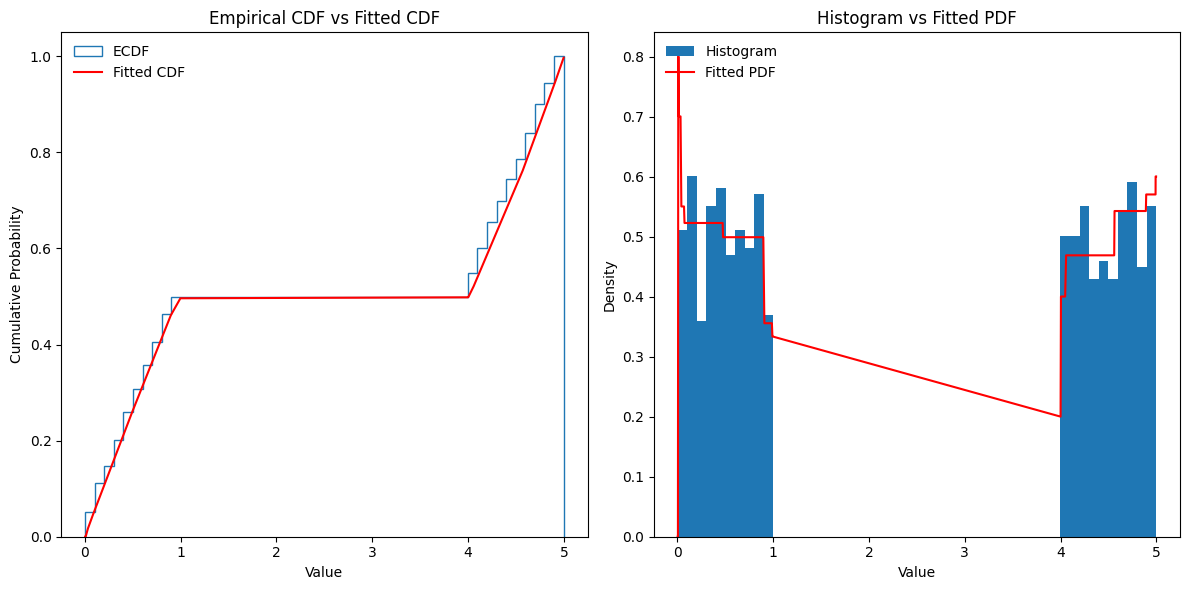

In [38]:
X1 = np.random.uniform(0, 1, 500)
X2 = np.random.uniform(4, 5, 500)

X = np.concatenate([X1, X2])
summarize(X)

Widzimy, że w tym przypadku test UU, źle sklasyfikował rozkład